In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

%matplotlib inline

In [14]:
x_n = 100
y_n = 150
c = np.array([
    [0, 1, 0, -1, 0, 1, -1, -1, 1],
    [0, 0, 1, 0, -1, 1, 1, -1, -1]
]).T
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])
rho_0 = 1
eps = 0.01
omega = 0.02

f = np.zeros((9,10,15))

In [15]:
def stream(f):
    for i in range(1, 9):
        f[i] = np.roll(f[i], c[i], axis=(0, 1))
        
def equilibrium(rho, u):
    cu = np.dot(u.T, c.T).T
    uu = np.sum(u**2, axis=0)
    return (w*(rho*(1 + 3*cu + 9/2*cu**2 - 3/2*uu)).T).T

def collide(f , omega):
    rho = np.einsum('xyz->yz',f)
    u = np.einsum('xyz,xi->iyz',f,c) / rho
    f += omega*(equilibrium(rho , u) - f)
    return rho , u

In [16]:
u = np.zeros((2,x_n,y_n))
rho = np.zeros((x_n,y_n))
x = np.linspace(0,x_n,x_n)
for i in np.arange(y_n):
    rho[:, i] = rho_0 + eps*np.sin(2*np.pi*x/x_n)
np.shape(rho)

f = equilibrium(rho, u)

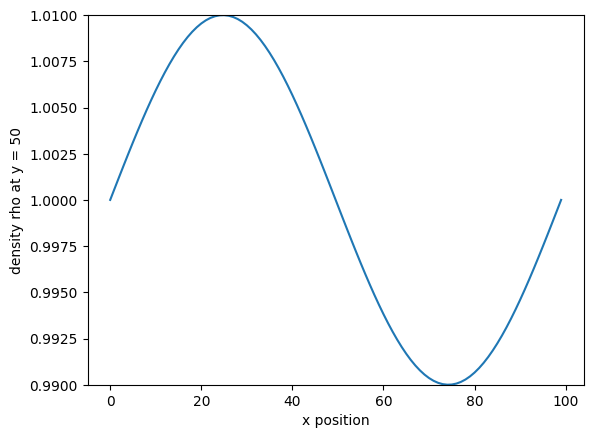

In [26]:
plt.ylim([0.99,1.01])
plt.ylabel('density rho at y = 50')
plt.xlabel('x position')
plt.plot(rho[:,50])

In [18]:
# plt.ylim([0.99,1.01])

# for x in range(100):
#     stream(f)
#     rho, u = collide(f, omega)

# plt.plot(rho[:,0])

In [19]:
rho2 = np.ones((x_n,y_n))
u2 = np.zeros((2,x_n,y_n))
y = np.linspace(0,y_n,y_n)
for i in np.arange(x_n):
    u2[0][i, : ] = np.sin(2*np.pi*y/y_n)

f2 = equilibrium(rho2, u2)

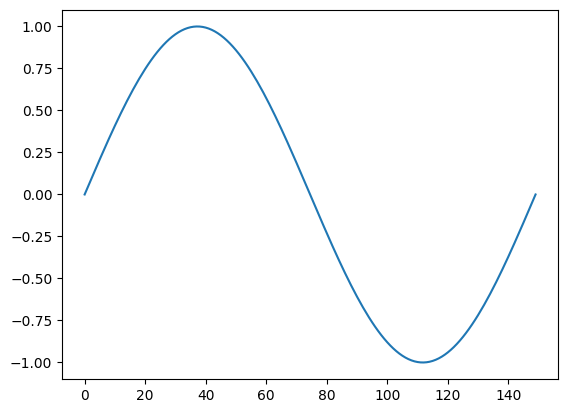

In [20]:
plt.plot(u2[0, 0])

In [21]:
# plt.ylim([-1,1])

# for x in range(100):
#     stream(f2)
#     rho2, u2 = collide(f2, omega)

# plt.plot(u2[0, 0])

In [22]:
method = 'density'
analytical_viscosity = []
simulated_viscosity = []
time_steps = 1000

def stokes_condition():
    points = []

    for x in range(time_steps):
        if method == 'density':
            stream(f)
            rho, u = collide(f, omega)
            points.append(np.max(np.abs(rho - rho_0)))
        else:
            stream(f2)
            rho2, u2 = collide(f2, omega)
            points.append(np.max(np.abs(u2[0])))


    if method == 'density':
        size = x_n    
        points = np.array(points)
        x = argrelextrema(points, np.greater)
        points = points[x]
        x = np.array(x).squeeze()

    else:
        size = y_n
        points = np.array(points)
        x = np.arange(0,time_steps)

    value = curve_fit(lambda t, v: eps * np.exp(-v * (2 * np.pi / size) ** 2 * t), x, points)[0][0]
    analytical_viscosity.append(1/3 * (1/omega -0.5))
    simulated_viscosity.append(value)

In [23]:
# W = np.arange(0.1,1.9,0.1)

# for x in W:
#     omega = x
#     stokes_condition()

    
# plt.plot(W, analytical_viscosity, label = 'analytic viscosity')
# plt.plot(W, simulated_viscosity, label = 'simulated viscosity')
# plt.show()
